# Load Library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import chardet

# Pre-Process

## Data Labeling

### load origin dataset

In [5]:
origin = pd.read_csv("C:\\Users\\asus\\Documents\\nids-pcap-dataset\\unsw_dataset.csv", encoding='MacRoman'
                   ,on_bad_lines='skip', index_col=None)
origin.rename(columns = {'_ws.col.Index':'index_ws',
                       '_ws.col.Info':'info_message',
                       '_ws.col.start_time':'start_time',
                       '_ws.col.Source':'source_ip',
                       '_ws.col.Destination':'destination_ip',
                       '_ws.col.Protocol':'protocol',
                       '_ws.col.sport':'source_port',
                       '_ws.col.dport':'destination_port'}, inplace = True)
origin.head()
origin.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489203 entries, 0 to 489202
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   source_ip         489203 non-null  object 
 1   destination_ip    489203 non-null  object 
 2   source_port       489203 non-null  int64  
 3   destination_port  489203 non-null  int64  
 4   protocol          489203 non-null  object 
 5   start_time        489203 non-null  float64
 6   info_message      489203 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 145.8 MB


In [6]:
# memory optimization with fast.ai
from fastai.tabular.core import df_shrink
origin = df_shrink(origin)
origin.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489203 entries, 0 to 489202
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   source_ip         489203 non-null  category
 1   destination_ip    489203 non-null  category
 2   source_port       489203 non-null  int32   
 3   destination_port  489203 non-null  int32   
 4   protocol          489203 non-null  category
 5   start_time        489203 non-null  float32 
 6   info_message      489203 non-null  category
dtypes: category(4), float32(1), int32(2)
memory usage: 10.9 MB


### load gt dataset

In [7]:
gt = pd.read_csv("C:\\Users\\asus\\Documents\\nids-pcap-dataset\\unsw_ground_truth\\NUSW-NB15_GT.csv"
                   ,on_bad_lines='skip')

In [8]:
import re
def clean_colname(colname):
    return re.sub(r'\s+', '_', colname.lower())

In [12]:
gt = gt.rename(columns={colname: clean_colname(colname) for colname in gt.columns})
gt.info(memory_usage='deep')
gt.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174347 entries, 0 to 174346
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   start_time          174347 non-null  int64 
 1   last_time           174347 non-null  int64 
 2   attack_category     174347 non-null  object
 3   attack_subcategory  170250 non-null  object
 4   protocol            174347 non-null  object
 5   source_ip           174347 non-null  object
 6   source_port         174347 non-null  int64 
 7   destination_ip      174347 non-null  object
 8   destination_port    174347 non-null  int64 
 9   attack_name         174346 non-null  object
 10  attack_reference    123709 non-null  object
 11  .                   174347 non-null  object
dtypes: int64(4), object(8)
memory usage: 156.5 MB


,start_time,last_time,attack_category,attack_subcategory,protocol,source_ip,source_port,destination_ip,destination_port,attack_name,attack_reference,.
0,1421927414,1421927416,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.nsf (https://strikecenter.bpointsys.com/bps/strikes/recon/http/domino/access_domino_doladmin_nsf.xml),-,.
1,1421927415,1421927415,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (https://strikecenter.bpointsys.com/bps/strikes/exploits/rservices/solaris_rwall_format_string.xml),CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cvename.cgi?name=2002%2d0573)BID 4639 (http://www.securityfocus.com/bid/4639)CVSS-High (https://strikecenter.bpointsys.com/bps/reference/CVSS/7.5%20%28AV%3aN%2fAC%3aL%2fAu%3aN%2fC%3aP%2fI%3aP%2fA%3aP%29),.
2,1421927416,1421927416,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Execution [009] (https://strikecenter.bpointsys.com/bps/strikes/exploits/browser/wmf_009.xml),CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cvename.cgi?name=2005%2d4560)BID 16074 (http://www.securityfocus.com/bid/16074)OSVDB 21987 (http://www.osvdb.org/21987)CVSS-High (https://strikecenter.bpointsys.com/bps/reference/CVSS/7.5%20%28AV%3aN%2fAC%3aL%2fAu%3aN%2fC%3aP%2fI%3aP%2fA%3aP%29),.
3,1421927417,1421927417,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter.bpointsys.com/bps/strikes/exploits/misc/cve_2011_1729.xml),CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cvename.cgi?name=2011%2d1729)BID 47638 (http://www.securityfocus.com/bid/47638)OSVDB 72188 (http://www.osvdb.org/72188)CVSS-Critical (https://strikecenter.bpointsys.com/bps/reference/CVSS/10.0%20%28AV%3aN%2fAC%3aL%2fAu%3aN%2fC%3aC%2fI%3aC%2fA%3aC%29),.
4,1421927418,1421927418,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 (https://strikecenter.bpointsys.com/bps/strikes/exploits/ios/cisco_auth_bypass_level_64.xml),CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cvename.cgi?name=2001%2d0537)BID 2936 (http://www.securityfocus.com/bid/2936)OSVDB 578 (http://www.osvdb.org/578)CVSS-High (https://strikecenter.bpointsys.com/bps/reference/CVSS/9.3%20%28AV%3aN%2fAC%3aM%2fAu%3aN%2fC%3aC%2fI%3aC%2fA%3aC%29),.


In [13]:
## memory optimization with fast.ai
gt = df_shrink(gt)
gt.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174347 entries, 0 to 174346
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   start_time          174347 non-null  int32   
 1   last_time           174347 non-null  int32   
 2   attack_category     174347 non-null  category
 3   attack_subcategory  170250 non-null  category
 4   protocol            174347 non-null  category
 5   source_ip           174347 non-null  category
 6   source_port         174347 non-null  int32   
 7   destination_ip      174347 non-null  category
 8   destination_port    174347 non-null  int32   
 9   attack_name         174346 non-null  category
 10  attack_reference    123709 non-null  category
 11  .                   174347 non-null  category
dtypes: category(8), int32(4)
memory usage: 11.8 MB


### Merging original & gt dataset

In [14]:
unsw_labeled = pd.merge(origin, gt, how='left', on=['source_ip', 'destination_ip', 'source_port', 'destination_port'])[
                ['source_ip', 'destination_ip', 'source_port', 'destination_port', 'info_message', 'attack_category']
                ]
unsw_labeled['is_malware'] = np.where(unsw_labeled['attack_category'].isnull(), 0, 1)

In [15]:
unsw_labeled['is_malware'] = np.where(unsw_labeled['attack_category'].isnull(), 0, 1)

In [16]:
unsw_labeled.head()

,source_ip,destination_ip,source_port,destination_port,info_message,attack_category,is_malware
0,149.171.126.18,175.45.176.1,80,4657,HTTP/1.1 200 OK [Malformed Packet],NaN,0
1,175.45.176.1,149.171.126.18,4657,80,GET /oKmwKoVbq HTTP/1.1,NaN,0
2,175.45.176.3,149.171.126.18,32473,80,GET /level/15/exec/-/buffers/assigned/dump HTTP/1.1,NaN,0
3,175.45.176.2,149.171.126.19,59386,8020,POST /HttpFileUpload/FileUploadController.do HTTP/1.1,NaN,0
4,149.171.126.14,175.45.176.0,80,21873,[TCP ACKed unseen segment] HTTP/1.1 200 OK (text/html),NaN,0


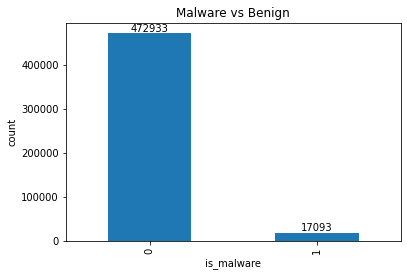

In [17]:
unsw_labeled.is_malware.value_counts().plot(kind='bar', title='Malware vs Benign')
plt.xlabel('is_malware')
plt.ylabel('count')
value_counts = unsw_labeled.is_malware.value_counts()
for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

In [19]:
# create new columns for graph modeling
unsw_labeled['source_ip_info'] = unsw_labeled['source_ip'].astype(str) + ' ' + unsw_labeled['info_message'].astype(str)
unsw_labeled['source_ip_info'] = unsw_labeled['source_ip_info'].astype(str)
unsw_labeled['source_port_info'] = unsw_labeled['source_port'].astype(str) + ' ' + unsw_labeled['info_message'].astype(str)
unsw_labeled['source_port_info'] = unsw_labeled['source_port_info'].astype(str)
unsw_labeled['dest_ip_info'] = unsw_labeled['destination_ip'].astype(str) + ' ' + unsw_labeled['info_message']
unsw_labeled['dest_ip_info'] = unsw_labeled['dest_ip_info'].astype(str)
unsw_labeled['dest_port_info'] = unsw_labeled['destination_port'].astype(str) + ' ' + unsw_labeled['info_message']
unsw_labeled['dest_port_info'] = unsw_labeled['dest_port_info'].astype(str)

## Data Cleaning

In [24]:
unsw_labeled = unsw_labeled[unsw_labeled['destination_port'] == '80']

In [63]:
list_of_words = ["GET", "HTTP"]
unsw_labeled = unsw_labeled[unsw_labeled['info_message'].str.contains('|'.join(list_of_words))]

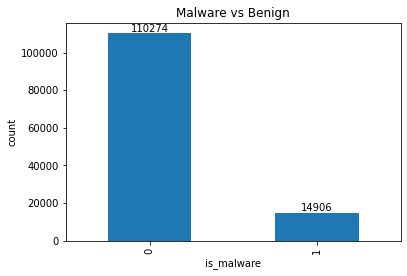

In [64]:
unsw_labeled.is_malware.value_counts().plot(kind='bar', title='Malware vs Benign')
plt.xlabel('is_malware')
plt.ylabel('count')
value_counts = unsw_labeled.is_malware.value_counts()
for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

In [ ]:
def make_conad_model(train_graph, train_node_features, 
                        label_train):
    
    train_node_features = torch.tensor(train_node_features)
    label_train = torch.tensor(label_train)

    pyG_train = from_networkx(train_graph)
    pyG_train = pyG_train.cpu()
    pyG_train.x = train_node_features.cpu()
    label_train = label_train.cpu()

    conad_model = CONAD(hid_dim=10, num_layers=16, 
                        lr=0.001, weight_decay= 1, contamination=0.37,
                        epoch=100, gpu=-1,  
                        weight=1, dropout=0.2, verbose=3)
    conad_compile = conad_model.fit(pyG_train, label_train)

    return conad_compile

In [ ]:
def predict_conad(conda_compile, test_graph, test_node_features, label_test):
    
    test_node_features = torch.tensor(test_node_features)
    label_test = torch.tensor(label_test)

    pyG_test = from_networkx(test_graph)
    pyG_test = pyG_test
    pyG_test.x = test_node_features
    
    conad_ip_pred_res, conad_ip_score_res = conda_compile.predict(data=pyG_test, label = label_test, return_pred=True, return_score=True, prob_method='linear', )
    f1_score_pygod = eval_f1(label_test, conad_ip_pred_res)
    precision = eval_precision_at_k(label_test, conad_ip_score_res)
    recall = eval_recall_at_k(label_test, conad_ip_score_res)
    f1_score = 2*(precision*recall)/(precision+recall)
    
    unique_values, counts = torch.unique(conad_ip_pred_res, return_counts=True)
    print(unique_values, counts)
    
    print("F1 score: ", f1_score)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 score pygod: ", f1_score_pygod)
    return f1_score_pygod, precision, recall

In [ ]:
conad_model = make_conad_model(train_graph, train_node_features, label_train)
precision_score, recall_score, f1_score = predict_conad(conad_model, test_graph, label_test,  test_node_features)

Epoch 0000: Loss 37.5968 | AUC 0.7805 | Recall 0.6532 | Precision 0.6532 | AP 0.6571 | F1 0.6532 | Time 8.91
Epoch 0001: Loss 37.5945 | AUC 0.7805 | Recall 0.6521 | Precision 0.6521 | AP 0.6570 | F1 0.6521 | Time 8.62
Epoch 0002: Loss 37.5923 | AUC 0.7808 | Recall 0.6532 | Precision 0.6532 | AP 0.6574 | F1 0.6532 | Time 6.91
Epoch 0003: Loss 37.5907 | AUC 0.7807 | Recall 0.6540 | Precision 0.6540 | AP 0.6573 | F1 0.6540 | Time 7.60
Epoch 0004: Loss 37.5878 | AUC 0.7810 | Recall 0.6538 | Precision 0.6538 | AP 0.6574 | F1 0.6538 | Time 6.55
Epoch 0005: Loss 37.5842 | AUC 0.7817 | Recall 0.6549 | Precision 0.6549 | AP 0.6580 | F1 0.6549 | Time 7.04
Epoch 0006: Loss 37.5851 | AUC 0.7819 | Recall 0.6555 | Precision 0.6555 | AP 0.6583 | F1 0.6555 | Time 5.68
Epoch 0007: Loss 37.5827 | AUC 0.7820 | Recall 0.6543 | Precision 0.6543 | AP 0.6582 | F1 0.6543 | Time 6.49
Epoch 0008: Loss 37.5815 | AUC 0.7821 | Recall 0.6555 | Precision 0.6555 | AP 0.6583 | F1 0.6555 | Time 6.45
Epoch 0009: Loss 37

In [ ]:
def make_anomalydae_model(train_graph, train_node_features, 
                        label_train):

    pyG_train = from_networkx(train_graph)
    pyG_train = pyG_train
    pyG_train.x = train_node_features
    label_train = label_train

    anomalydae_model = AnomalyDAE(hid_dim=12, emb_dim=4, 
                        lr=0.001, contamination=0.37,
                        epoch=100, gpu=0,
                        weight=1, verbose=3)
    anomalydae_compile = anomalydae_model.fit(pyG_train, label_train)

    return anomalydae_compile

In [ ]:
def predict_anomalydae(label_test, anomalydae_compile, pyG_test):

    test_node_features = torch.tensor(test_node_features)
    label_test = torch.tensor(label_test)
    
    pyG_test = from_networkx(test_graph)
    pyG_test = pyG_test
    pyG_test.x = test_node_features

    anomalydae_ip_pred_res, anomalydae_ip_score_res = anomalydae_compile.predict(data=pyG_test, label = label_test, return_pred=True, return_score=True, prob_method='linear', )
    
    precision_pygod = eval_precision_at_k(label_test, anomalydae_ip_score_res)
    recall_pygod = eval_recall_at_k(label_test, anomalydae_ip_score_res)
    f1_score = 2*(precision_pygod*recall_pygod)/(precision_pygod+recall_pygod)
    
    print("F1 score: ", f1_score)
    print("Precision: ", precision_pygod)
    print("Recall: ", recall_pygod)
    return f1_score, precision_pygod, recall_pygod

In [ ]:

anomalydae_model = make_anomalydae_model(train_graph, train_node_features, label_train)
precision_score, recall_score, f1_score = predict_anomalydae(label_test, anomalydae_model, graph_test)

Epoch 0000: Loss 6808.8037 | AUC 0.8459 | Recall 0.6921 | Precision 0.6921 | AP 0.7182 | F1 0.6921 | Time 0.97
Epoch 0001: Loss 146.2048 | AUC 0.8468 | Recall 0.6967 | Precision 0.6967 | AP 0.7175 | F1 0.6967 | Time 0.68
Epoch 0002: Loss 146.1078 | AUC 0.8468 | Recall 0.6967 | Precision 0.6967 | AP 0.7175 | F1 0.6967 | Time 8.99
Epoch 0003: Loss 145.8769 | AUC 0.8468 | Recall 0.6967 | Precision 0.6967 | AP 0.7175 | F1 0.6967 | Time 8.63
Epoch 0004: Loss 145.5796 | AUC 0.8468 | Recall 0.6967 | Precision 0.6967 | AP 0.7176 | F1 0.6967 | Time 8.81
Epoch 0005: Loss 145.2428 | AUC 0.8469 | Recall 0.6967 | Precision 0.6967 | AP 0.7177 | F1 0.6967 | Time 8.70
Epoch 0006: Loss 144.8798 | AUC 0.8469 | Recall 0.6967 | Precision 0.6967 | AP 0.7178 | F1 0.6967 | Time 8.75
Epoch 0007: Loss 144.4981 | AUC 0.8467 | Recall 0.6967 | Precision 0.6967 | AP 0.7178 | F1 0.6967 | Time 8.73
Epoch 0008: Loss 144.1026 | AUC 0.8467 | Recall 0.6965 | Precision 0.6965 | AP 0.7179 | F1 0.6965 | Time 8.77
Epoch 000

In [ ]:
print()

In [65]:
voting_dataset = unsw_labeled[['info_message', 'is_malware']].copy()

In [66]:
voting_dataset['count_benign'] = voting_dataset.groupby(['info_message'])['is_malware'].transform(lambda x: (x == 0).sum())
voting_dataset['count_malware'] = voting_dataset.groupby(['info_message'])['is_malware'].transform(lambda x: (x == 1).sum())

In [67]:
voting_dataset['label'] = voting_dataset.apply(lambda x: 1 if x['count_malware'] > x['count_benign'] else 0, axis=1)

In [138]:
unsw_labeled['is_malware']  = np.where(unsw_labeled['info_message'] == voting_dataset['info_message'], voting_dataset['label'], voting_dataset['label'])

In [ ]:
unsw_labeled['count_benign'] = voting_dataset['count_benign'].copy()
unsw_labeled['count_malware'] = voting_dataset['count_malware'].copy()

In [ ]:
unsw_labeled.head()

,source_ip,destination_ip,source_port,destination_port,info_message,attack_category,is_malware,source_ip_info,source_port_info,dest_ip_info,dest_port_info,count_benign,count_malware
1,175.45.176.1,149.171.126.18,4657,80,GET /oKmwKoVbq HTTP/1.1,NaN,0,175.45.176.1 GET /oKmwKoVbq HTTP/1.1,4657 GET /oKmwKoVbq HTTP/1.1,149.171.126.18 GET /oKmwKoVbq HTTP/1.1,80 GET /oKmwKoVbq HTTP/1.1,1,0
2,175.45.176.3,149.171.126.18,32473,80,GET /level/15/exec/-/buffers/assigned/dump HTTP/1.1,NaN,1,175.45.176.3 GET /level/15/exec/-/buffers/assigned/dump HTTP/1.1,32473 GET /level/15/exec/-/buffers/assigned/dump HTTP/1.1,149.171.126.18 GET /level/15/exec/-/buffers/assigned/dump HTTP/1.1,80 GET /level/15/exec/-/buffers/assigned/dump HTTP/1.1,1,7
6,175.45.176.0,149.171.126.17,49194,80,GET eLWfxXSPkc HTTP/1.1,NaN,0,175.45.176.0 GET eLWfxXSPkc HTTP/1.1,49194 GET eLWfxXSPkc HTTP/1.1,149.171.126.17 GET eLWfxXSPkc HTTP/1.1,80 GET eLWfxXSPkc HTTP/1.1,1,0
9,175.45.176.1,149.171.126.14,51435,80,GET / HTTP/1.1,NaN,0,175.45.176.1 GET / HTTP/1.1,51435 GET / HTTP/1.1,149.171.126.14 GET / HTTP/1.1,80 GET / HTTP/1.1,46862,1313
10,175.45.176.1,149.171.126.19,64694,80,GET /scripts/cbag/ag.exe?page=FileDownload&id=../../../../../../../../../../../11G&notimecard=1&type=text&subtype=html&ct=1 HTTP/1.1,NaN,0,175.45.176.1 GET /scripts/cbag/ag.exe?page=FileDownload&id=../../../../../../../../../../../11G&notimecard=1&type=text&subtype=html&ct=1 HTTP/1.1,64694 GET /scripts/cbag/ag.exe?page=FileDownload&id=../../../../../../../../../../../11G&notimecard=1&type=text&subtype=html&ct=1 HTTP/1.1,149.171.126.19 GET /scripts/cbag/ag.exe?page=FileDownload&id=../../../../../../../../../../../11G&notimecard=1&type=text&subtype=html&ct=1 HTTP/1.1,80 GET /scripts/cbag/ag.exe?page=FileDownload&id=../../../../../../../../../../../11G&notimecard=1&type=text&subtype=html&ct=1 HTTP/1.1,1,0


In [ ]:
ambigous_data = unsw_labeled[unsw_labeled.count_benign == unsw_labeled.count_malware]

In [69]:
ambigous_data.head()

,source_ip,destination_ip,source_port,destination_port,info_message,attack_category,is_malware,source_ip_info,source_port_info,dest_ip_info,dest_port_info,count_benign,count_malware
23911,175.45.176.1,149.171.126.11,31627,80,GET /%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s HTTP/1.1,Fuzzers,0,175.45.176.1 GET /%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s HTTP/1.1,31627 GET /%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s HTTP/1.1,149.171.126.11 GET /%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s HTTP/1.1,80 GET /%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s%25s HTTP/1.1,4,4
36334,175.45.176.3,149.171.126.11,65394,80,GET /V.php HTTP/1.1,Fuzzers,0,175.45.176.3 GET /V.php HTTP/1.1,65394 GET /V.php HTTP/1.1,149.171.126.11 GET /V.php HTTP/1.1,80 GET /V.php HTTP/1.1,1,1
44278,175.45.176.0,149.171.126.17,53573,80,GET /~aakuney/Aug20-flash/poc.html HTTP/1.1,Generic,0,175.45.176.0 GET /~aakuney/Aug20-flash/poc.html HTTP/1.1,53573 GET /~aakuney/Aug20-flash/poc.html HTTP/1.1,149.171.126.17 GET /~aakuney/Aug20-flash/poc.html HTTP/1.1,80 GET /~aakuney/Aug20-flash/poc.html HTTP/1.1,1,1
44279,175.45.176.0,149.171.126.17,53573,80,GET /~aakuney/Aug20-flash/poc.swf HTTP/1.1,Generic,0,175.45.176.0 GET /~aakuney/Aug20-flash/poc.swf HTTP/1.1,53573 GET /~aakuney/Aug20-flash/poc.swf HTTP/1.1,149.171.126.17 GET /~aakuney/Aug20-flash/poc.swf HTTP/1.1,80 GET /~aakuney/Aug20-flash/poc.swf HTTP/1.1,1,1
46843,175.45.176.1,149.171.126.16,30871,80,GET /~the/poc.mov HTTP/1.1,Generic,0,175.45.176.1 GET /~the/poc.mov HTTP/1.1,30871 GET /~the/poc.mov HTTP/1.1,149.171.126.16 GET /~the/poc.mov HTTP/1.1,80 GET /~the/poc.mov HTTP/1.1,1,1


In [70]:
unsw_labeled = unsw_labeled.drop(unsw_labeled[unsw_labeled.count_benign == unsw_labeled.count_malware].index)

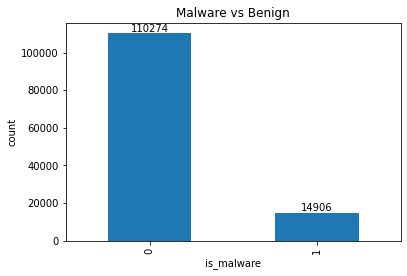

In [71]:
unsw_labeled.is_malware.value_counts().plot(kind='bar', title='Malware vs Benign')
plt.xlabel('is_malware')
plt.ylabel('count')
value_counts = unsw_labeled.is_malware.value_counts()
for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

In [72]:
unsw_labeled.to_parquet('C:\\Users\\asus\\Documents\\nids-pcap-dataset\\unsw_parquet_used_dataset\\unsw_labeled.parquet')

In [104]:
unsw_labeled.is_malware.value_counts()

is_malware
0    110274
1     14906
Name: count, dtype: int64

In [88]:
unsw_nd = unsw_labeled.drop_duplicates(subset=['info_message'], keep='first')

In [89]:
unsw_nd.is_malware.value_counts()

is_malware
1    8009
0    2252
Name: count, dtype: int64

In [91]:
unsw_nd_sip = unsw_labeled.drop_duplicates(subset=['source_ip_info'], keep='first')

In [94]:
unsw_nd_sip.is_malware.value_counts()

is_malware
1    9996
0    3640
Name: count, dtype: int64

In [95]:
unsw_nd_dip = unsw_labeled.drop_duplicates(subset=['dest_ip_info'], keep='first')

In [96]:
unsw_nd_dip.is_malware.value_counts()

is_malware
1    11331
0     3623
Name: count, dtype: int64

In [97]:
unsw_nd_sp = unsw_labeled.drop_duplicates(subset=['source_port_info'], keep='first')

In [98]:
unsw_nd_sp.is_malware.value_counts()

is_malware
0    81007
1    13683
Name: count, dtype: int64

In [100]:
unsw_nd_dp = unsw_labeled.drop_duplicates(subset=['dest_port_info'], keep='first')

In [102]:
unsw_nd_dp.is_malware.value_counts()

is_malware
1    8009
0    2252
Name: count, dtype: int64

# Graph Modeling

In [1]:
import networkx as nx
import torch
import pickle

In [3]:
unsw_labeled_path = "C:\\Users\\asus\\Documents\\nids-pcap-dataset\\unsw_parquet_used_dataset\\unsw_labeled.parquet"

In [4]:
unsw_labeled = pd.read_parquet(unsw_labeled_path)

<AxesSubplot:title={'center':'Malware vs Benign'}, xlabel='is_malware'>

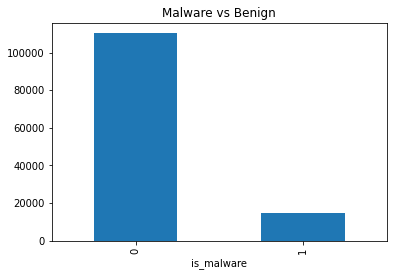

In [7]:
unsw_labeled.is_malware.value_counts().plot(kind='bar', title='Malware vs Benign')

## Combination A
### info_message as Node & source_ip as Edge

In [6]:
graph_A = nx.Graph()
for info_message in unsw_labeled["info_message"].unique():
    graph_A.add_node(info_message)

for (source_ip), group in unsw_labeled.groupby(["source_ip"]):
    for i in range(len(group) - 1):
        from_node = group.iloc[i]["info_message"]
        to_node = group.iloc[i+1]["info_message"]
        if graph_A.has_edge(from_node, to_node):
            graph_A[from_node][to_node]["weight"] += 1
        else:
            graph_A.add_edge(from_node, to_node, weight=1)

In [78]:
pickle.dump(graph_A, open('model_graph/graph_A.pickle', 'wb'))

In [126]:
## open the graph
graph_A = pickle.load(open('model_graph/graph_A.pickle', 'rb'))

In [127]:
# Get a list of nodes with no edges
isolated_nodes = list(nx.isolates(graph_A))
# Print the isolated nodes
print("Isolated nodes:", len(isolated_nodes), "\n")
# get the number of nodes in the graph
print("Number of nodes:", len(graph_A.nodes()), "\n")

Isolated nodes: 0 

Number of nodes: 10261 



## Combination B
### Info_message as Node & source_port as Edge

In [80]:
graph_B = nx.Graph()
for info_message in unsw_labeled["info_message"].unique():
    graph_B.add_node(info_message)

for (source_port), group in unsw_labeled.groupby(["source_port"]):
    for i in range(len(group) - 1):
        from_node = group.iloc[i]["info_message"]
        to_node = group.iloc[i+1]["info_message"]
        if graph_B.has_edge(from_node, to_node):
            graph_B[from_node][to_node]["weight"] += 1
        else:
            graph_B.add_edge(from_node, to_node, weight=1)

In [81]:
pickle.dump(graph_B, open('model_graph/graph_B.pickle', 'wb'))

In [128]:
## open the graph
graph_B = pickle.load(open('model_graph/graph_B.pickle', 'rb'))

In [129]:
# Get a list of nodes with no edges
isolated_nodes = list(nx.isolates(graph_B))

# Print the isolated nodes
print("Isolated nodes:", len(isolated_nodes), "\n")
# get the number of nodes in the graph
print("Number of nodes:", len(graph_B.nodes()), "\n")

Isolated nodes: 2251 

Number of nodes: 10261 



## Combination C
### 1. info_message as Node
#### 2. source_ip & source_port as Edge

In [83]:
graph_C = nx.Graph()
for info_message in unsw_labeled["info_message"].unique():
    graph_C.add_node(info_message)

for (source_ip, source_port), group in unsw_labeled.groupby(["source_ip", "source_port"]):
    for i in range(len(group) - 1):
        from_node = group.iloc[i]["info_message"]
        to_node = group.iloc[i+1]["info_message"]
        if graph_C.has_edge(from_node, to_node):
            graph_C[from_node][to_node]["weight"] += 1
        else:
            graph_C.add_edge(from_node, to_node, weight=1)

In [84]:
pickle.dump(graph_C, open('model_graph/graph_C.pickle', 'wb'))

In [130]:
## open the graph
graph_C = pickle.load(open('model_graph/graph_C.pickle', 'rb'))

In [131]:
# Get a list of nodes with no edges
isolated_nodes = list(nx.isolates(graph_C))

# Print the isolated nodes
print("Isolated nodes:", len(isolated_nodes), "\n")
# get the number of nodes in the graph
print("Number of nodes:", len(graph_C.nodes()), "\n")

Isolated nodes: 7413 

Number of nodes: 10261 



## Combination D
### source_port_info as Node & source_ip as Edge

In [8]:
graph_D = nx.Graph()
for info_message in unsw_labeled["source_port_info"].unique():
    graph_D.add_node(info_message)
for (source_ip), group in unsw_labeled.groupby(["source_ip"]):
    for i in range(len(group) - 1):
        from_node = group.iloc[i]["source_port_info"]
        to_node = group.iloc[i+1]["source_port_info"]
        if graph_D.has_edge(from_node, to_node):
            graph_D[from_node][to_node]["weight"] += 1
        else:
            graph_D.add_edge(from_node, to_node, weight=1)

In [119]:
pickle.dump(graph_D, open('model_graph/graph_D.pickle', 'wb'))

In [132]:
## open the graph
graph_D = pickle.load(open('model_graph/graph_D.pickle', 'rb'))

In [133]:
# Get a list of nodes with no edges
isolated_nodes = list(nx.isolates(graph_D))
# Print the isolated nodes
print("Isolated nodes:", len(isolated_nodes), "\n")
# get the number of nodes in the graph
print("Number of nodes:", len(graph_D.nodes()), "\n")

Isolated nodes: 0 

Number of nodes: 94690 



## Combination E
### source_port_info as Node & source_port as Edge

In [117]:
graph_E = nx.Graph()
for info_message in unsw_labeled["source_port_info"].unique():
    graph_E.add_node(info_message)
for (source_port) , group in unsw_labeled.groupby(["source_port"]):
    for i in range(len(group) - 1):
        from_node = group.iloc[i]["source_port_info"]
        to_node = group.iloc[i+1]["source_port_info"]
        if graph_E.has_edge(from_node, to_node):
            graph_E[from_node][to_node]["weight"] += 1
        else:
            graph_E.add_edge(from_node, to_node, weight=1)

In [120]:
pickle.dump(graph_E, open('model_graph/graph_E.pickle', 'wb'))

In [134]:
## open the graph
graph_E = pickle.load(open('model_graph/graph_E.pickle', 'rb'))

In [135]:
# Get a list of nodes with no edges
isolated_nodes = list(nx.isolates(graph_E))

# Print the isolated nodes
print("Isolated nodes:", len(isolated_nodes), "\n")
# get the number of nodes in the graph
print("Number of nodes:", len(graph_E.nodes()), "\n")

Isolated nodes: 8749 

Number of nodes: 94690 



## Combination F
### source_port_info as Node & source_ip|source_port as Edge

In [122]:
graph_F = nx.Graph()
for info_message in unsw_labeled["source_port_info"].unique():
    graph_F.add_node(info_message)
for (source_ip, source_port), group in unsw_labeled.groupby(["source_ip", "source_port"]):
    for i in range(len(group) - 1):
        from_node = group.iloc[i]["source_port_info"]
        to_node = group.iloc[i+1]["source_port_info"]
        if graph_F.has_edge(from_node, to_node):
            graph_F[from_node][to_node]["weight"] += 1
        else:
            graph_F.add_edge(from_node, to_node, weight=1)

In [125]:
pickle.dump(graph_F, open('model_graph/graph_F.pickle', 'wb'))

In [136]:
## open the graph
graph_F = pickle.load(open('model_graph/graph_F.pickle', 'rb'))

In [137]:
# Get a list of nodes with no edges
isolated_nodes = list(nx.isolates(graph_F))

# Print the isolated nodes
print("Isolated nodes:", len(isolated_nodes), "\n")
# get the number of nodes in the graph
print("Number of nodes:", len(graph_F.nodes()), "\n")

Isolated nodes: 24693 

Number of nodes: 94690 

